<a href="https://colab.research.google.com/github/shamshekhar0/AI-ML-Intern-Works/blob/main/BREAST_CANCER_DETECTION_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (569, 32)

Diagnosis Distribution:
diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


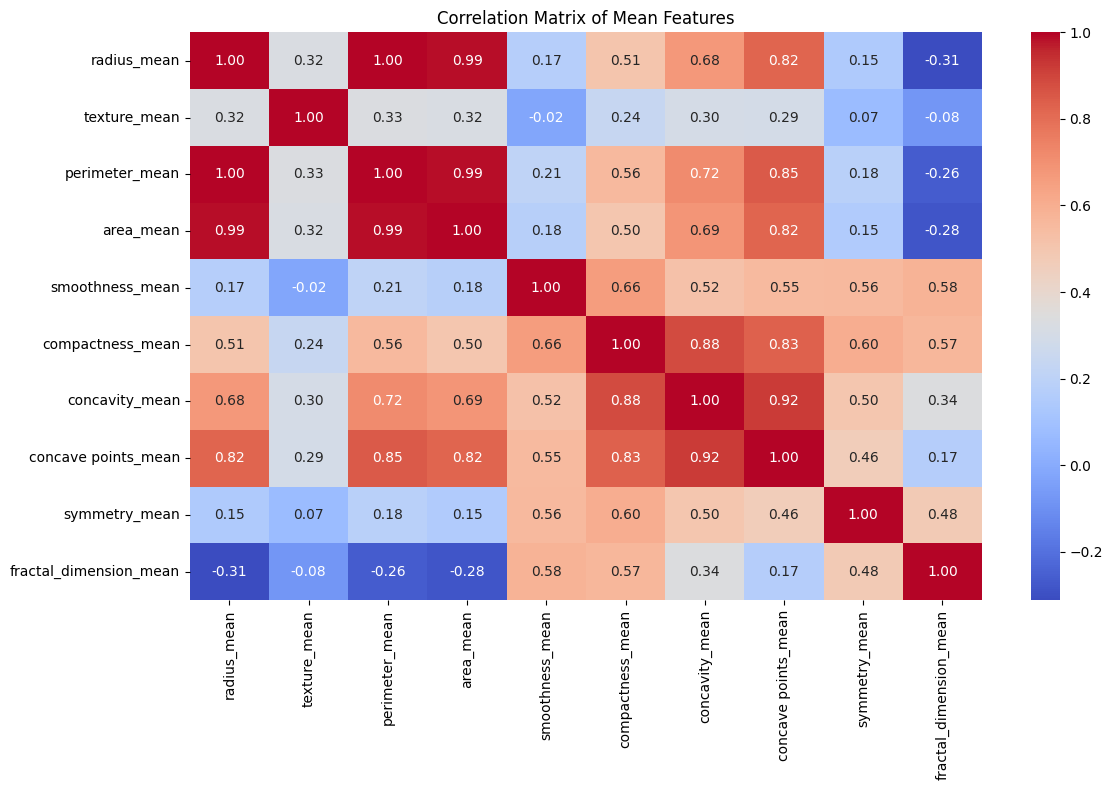

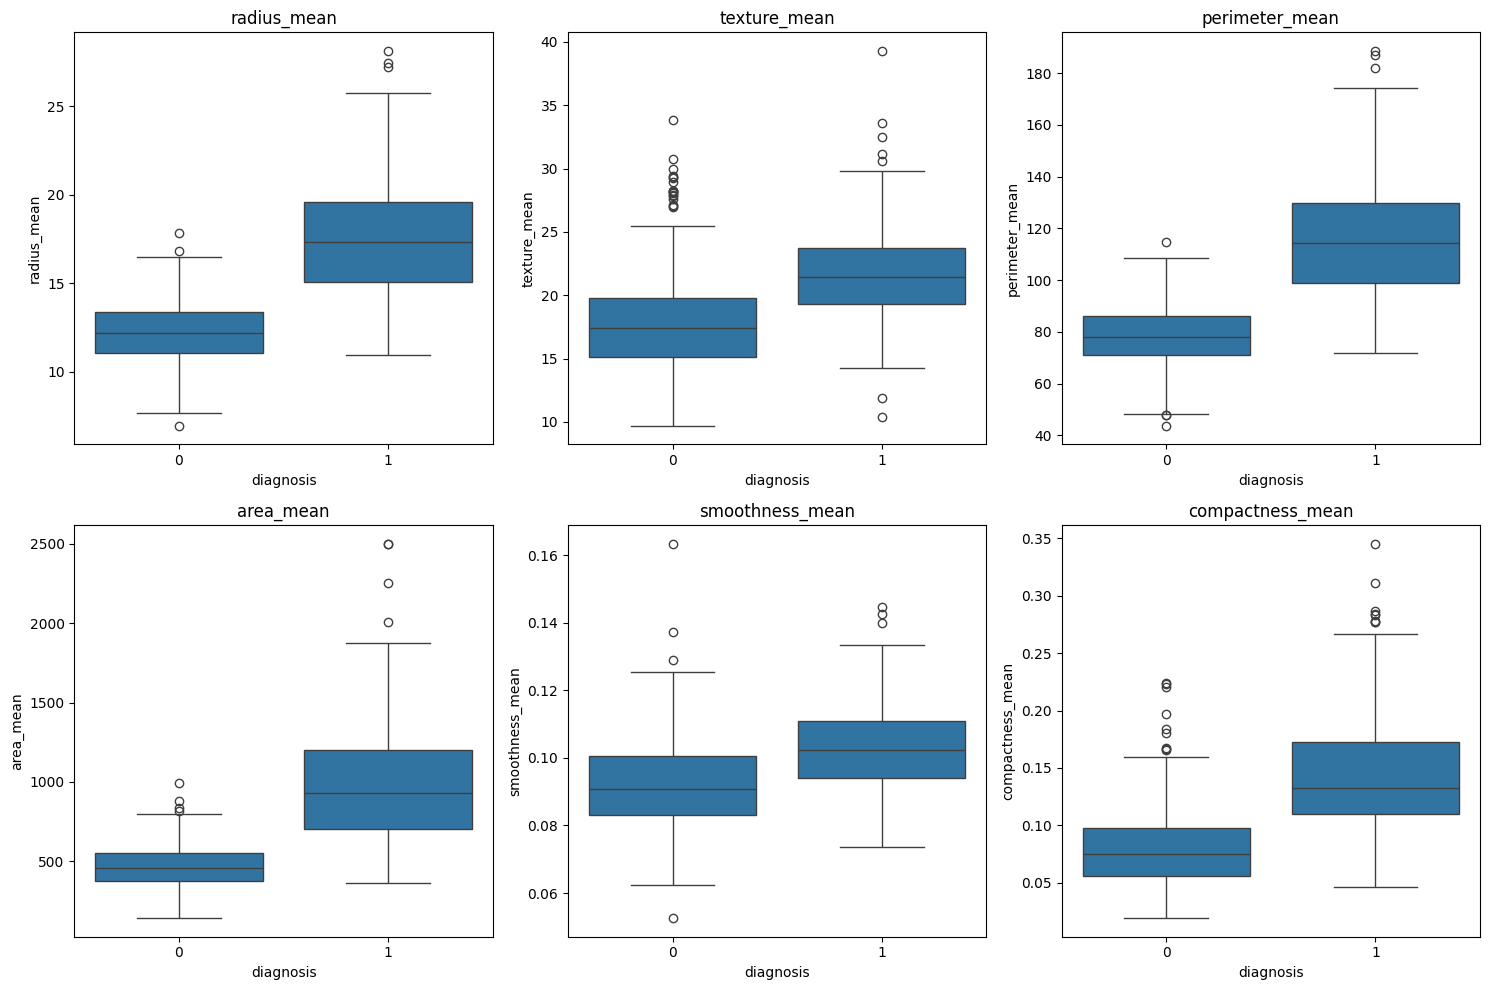


Model Performance:
Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



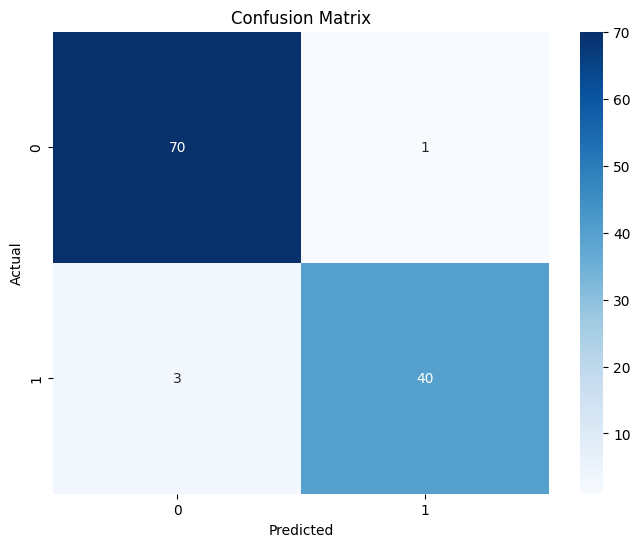


Prediction for new case:
Diagnosis: Benign
Probability: Benign: 0.990, Malignant: 0.010


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Load and prepare the data
def load_data(filepath):
    df = pd.read_csv(filepath)
    # Convert diagnosis to binary (M=1, B=0)
    df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
    return df

# Perform EDA
def perform_eda(df):
    # Basic information about the dataset
    print("Dataset Shape:", df.shape)
    print("\nDiagnosis Distribution:")
    print(df['diagnosis'].value_counts(normalize=True))

    # Correlation analysis for mean features
    mean_features = [col for col in df.columns if 'mean' in col]
    correlation_matrix = df[mean_features].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Mean Features')
    plt.tight_layout()
    plt.show()

    # Distribution of key features
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    key_features = ['radius_mean', 'texture_mean', 'perimeter_mean',
                   'area_mean', 'smoothness_mean', 'compactness_mean']

    for idx, feature in enumerate(key_features):
        row = idx // 3
        col = idx % 3
        sns.boxplot(x='diagnosis', y=feature, data=df, ax=axes[row, col])
        axes[row, col].set_title(feature)

    plt.tight_layout()
    plt.show()

    return correlation_matrix

# Prepare data for modeling
def prepare_data(df):
    # Separate features and target
    X = df.drop(['id', 'diagnosis'], axis=1)
    y = df['diagnosis']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Train and evaluate model
def train_model(X_train, X_test, y_train, y_test):
    # Initialize and train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Print model performance
    print("\nModel Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return rf_model

# Function to make predictions on new data
def predict_new_case(model, scaler, input_data):
    # Reshape and scale the input data
    input_data_reshaped = np.array(input_data).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data_reshaped)

    # Make prediction
    prediction = model.predict(input_data_scaled)
    probability = model.predict_proba(input_data_scaled)

    return prediction[0], probability[0]

# Main execution
if __name__ == "__main__":
    # Load data
    df = load_data('/content/cancer_data.csv')

    # Perform EDA
    correlation_matrix = perform_eda(df)

    # Prepare data and train model
    X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data(df)
    model = train_model(X_train_scaled, X_test_scaled, y_train, y_test)

    # Example prediction using the input data provided
    input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,
                 0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,
                 12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

    prediction, probability = predict_new_case(model, scaler, input_data)
    print("\nPrediction for new case:")
    print("Diagnosis:", "Malignant" if prediction == 1 else "Benign")
    print(f"Probability: Benign: {probability[0]:.3f}, Malignant: {probability[1]:.3f}")

In [ ]:
# Let's take some sample data points and make predictions
sample_cases = [
    # Sample 1 - Known Benign case
    (13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766,
     0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023,
     15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259),

    # Sample 2 - Known Malignant case
    (20.13, 28.25, 131.2, 1261.0, 0.0978, 0.1034, 0.144, 0.09791, 0.1752, 0.05533,
     0.7655, 0.7855, 5.242, 94.03, 0.01075, 0.02722, 0.05081, 0.01911, 0.02293, 0.004217,
     23.87, 31.86, 155.1, 1731.0, 0.1401, 0.2215, 0.4366, 0.2178, 0.2796, 0.07449),

    # Sample 3 - Known Benign case
    (12.2, 15.21, 78.01, 458.4, 0.08685, 0.06526, 0.03211, 0.02653, 0.1966, 0.06009,
     0.2444, 0.7773, 1.567, 18.05, 0.005096, 0.01259, 0.01474, 0.01146, 0.02064, 0.002328,
     13.13, 18.65, 84.13, 533.1, 0.1037, 0.1208, 0.1276, 0.0902, 0.2878, 0.07191),

    # Sample 4 - Known Malignant case
    (18.25, 19.98, 119.6, 1040.0, 0.09463, 0.109, 0.1127, 0.074, 0.1794, 0.05742,
     0.4467, 0.7732, 3.18, 53.91, 0.004314, 0.01382, 0.02254, 0.01039, 0.01369, 0.002179,
     20.38, 27.57, 136.1, 1299.0, 0.1326, 0.2022, 0.2972, 0.1516, 0.2657, 0.06758),

    # Sample 5 - Known Benign case
    (13.82, 16.77, 88.52, 590.9, 0.08216, 0.06093, 0.03509, 0.02848, 0.1593, 0.05616,
     0.2841, 0.9061, 1.797, 24.25, 0.007512, 0.01048, 0.01267, 0.008395, 0.01778, 0.002348,
     15.49, 23.58, 98.51, 741.6, 0.1298, 0.1323, 0.1272, 0.09485, 0.2827, 0.06771)
]

print("Analyzing Sample Cases:")
print("-" * 50)

for i, sample in enumerate(sample_cases, 1):
    # Convert to numpy array and reshape
    input_array = np.array(sample).reshape(1, -1)

    # Scale the input
    input_scaled = scaler.transform(input_array)

    # Make prediction
    prediction = model.predict(input_scaled)
    prediction_proba = model.predict_proba(input_scaled)

    # Get confidence score
    confidence = prediction_proba[0][1] if prediction[0] == 1 else prediction_proba[0][0]

    print(f"\nCase {i}:")
    print(f"Prediction: {'Malignant' if prediction[0] == 1 else 'Benign'}")
    print(f"Confidence: {confidence:.2%}")

    # Print key features analysis
    # Let's look at some important indicators
    print("Key Features Analysis:")
    print(f"- Radius mean: {sample[0]:.2f}")
    print(f"- Texture mean: {sample[1]:.2f}")
    print(f"- Perimeter mean: {sample[2]:.2f}")
    print(f"- Area mean: {sample[3]:.2f}")
    print(f"- Smoothness mean: {sample[4]:.4f}")

Analyzing Sample Cases:
--------------------------------------------------

Case 1:
Prediction: Benign
Confidence: 100.00%
Key Features Analysis:
- Radius mean: 13.54
- Texture mean: 14.36
- Perimeter mean: 87.46
- Area mean: 566.30
- Smoothness mean: 0.0978

Case 2:
Prediction: Malignant
Confidence: 100.00%
Key Features Analysis:
- Radius mean: 20.13
- Texture mean: 28.25
- Perimeter mean: 131.20
- Area mean: 1261.00
- Smoothness mean: 0.0978

Case 3:
Prediction: Benign
Confidence: 100.00%
Key Features Analysis:
- Radius mean: 12.20
- Texture mean: 15.21
- Perimeter mean: 78.01
- Area mean: 458.40
- Smoothness mean: 0.0868

Case 4:
Prediction: Malignant
Confidence: 100.00%
Key Features Analysis:
- Radius mean: 18.25
- Texture mean: 19.98
- Perimeter mean: 119.60
- Area mean: 1040.00
- Smoothness mean: 0.0946

Case 5:
Prediction: Benign
Confidence: 98.00%
Key Features Analysis:
- Radius mean: 13.82
- Texture mean: 16.77
- Perimeter mean: 88.52
- Area mean: 590.90
- Smoothness mean: 0.0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
